In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, log_loss
)
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv(r'predictive_maintenance.csv')
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [6]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [7]:
target_counts = df['Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Count']
print("\nTarget Variable Counts:")
print(tabulate(target_counts, headers='keys', tablefmt='fancy_grid'))


Target Variable Counts:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ    ‚îÇ   Target ‚îÇ   Count ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ  0 ‚îÇ        0 ‚îÇ    9661 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ  1 ‚îÇ        1 ‚îÇ     339 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ


In [8]:
print("\nUnique Failure Types:")
print(", ".join(df['Failure Type'].unique()))
failure_counts = df['Failure Type'].value_counts().reset_index()
failure_counts.columns = ['Failure Type', 'Count']
print("\nFailure Type Counts:")
print(tabulate(failure_counts, headers='keys', tablefmt='fancy_grid'))
crosstab = pd.crosstab(df['Target'], df['Failure Type'])


Unique Failure Types:
No Failure, Power Failure, Tool Wear Failure, Overstrain Failure, Random Failures, Heat Dissipation Failure

Failure Type Counts:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ    ‚îÇ Failure Type             ‚îÇ   Count ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ  0 ‚îÇ No Failure               ‚îÇ    9652 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ  1 ‚îÇ Heat Dissipation Failure ‚îÇ     112 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ  2 ‚îÇ Power Failure            ‚îÇ      95 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

In [9]:
print("\nRelationship between Target and Failure Type:")
print(tabulate(crosstab, headers='keys', tablefmt='fancy_grid'))
failure_mapping = {
    'No Failure': 0,
    'Power Failure': 1,
    'Tool Wear Failure': 1,
    'Overstrain Failure': 1,
    'Random Failures': 1,
    'Heat Dissipation Failure': 1
}
df['Failure Type Binary'] = df['Failure Type'].map(failure_mapping)


Relationship between Target and Failure Type:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ   Target ‚îÇ   Heat Dissipation Failure ‚îÇ   No Failure ‚îÇ   Overstrain Failure ‚îÇ   Power Failure ‚îÇ   Random Failures ‚îÇ   Tool Wear Failure ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚

In [10]:
correlation = df[['Target', 'Failure Type Binary']].corr()
print("\nCorrelation between Failure Type Binary and Target:")
print(tabulate(correlation, headers='keys', tablefmt='fancy_grid', floatfmt=".6f"))
crosstab_type_target = pd.crosstab(df['Type'], df['Target'], normalize='index')


Correlation between Failure Type Binary and Target:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ                     ‚îÇ   Target ‚îÇ   Failure Type Binary ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Target              ‚îÇ 1.000000 ‚îÇ              0.959389 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Failure Type Binary ‚îÇ 0.959389 ‚îÇ              1.000000 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ


In [11]:
crosstab_type_target = crosstab_type_target.round(4)

print("\nCross-tabulation of Type vs Target (Normalized):")
print(tabulate(crosstab_type_target, headers='keys', tablefmt='fancy_grid'))
df['Type_numeric'] = df['Type'].map({'H': 0, 'L': 1, 'M': 2})
correlation = df[['Type_numeric', 'Target']].corr()


Cross-tabulation of Type vs Target (Normalized):
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Type   ‚îÇ      0 ‚îÇ      1 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ H      ‚îÇ 0.9791 ‚îÇ 0.0209 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ L      ‚îÇ 0.9608 ‚îÇ 0.0392 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ M      ‚îÇ 0.9723 ‚îÇ 0.0277 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ


In [12]:
print("Correlation between 'Type' and 'Target':")
print(tabulate(correlation, headers='keys', tablefmt='fancy_grid', floatfmt=".6f"))

Correlation between 'Type' and 'Target':
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ              ‚îÇ   Type_numeric ‚îÇ    Target ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Type_numeric ‚îÇ       1.000000 ‚îÇ -0.005152 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Target       ‚îÇ      -0.005152 ‚îÇ  1.000000 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ


In [13]:
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                 'Torque [Nm]', 'Tool wear [min]']

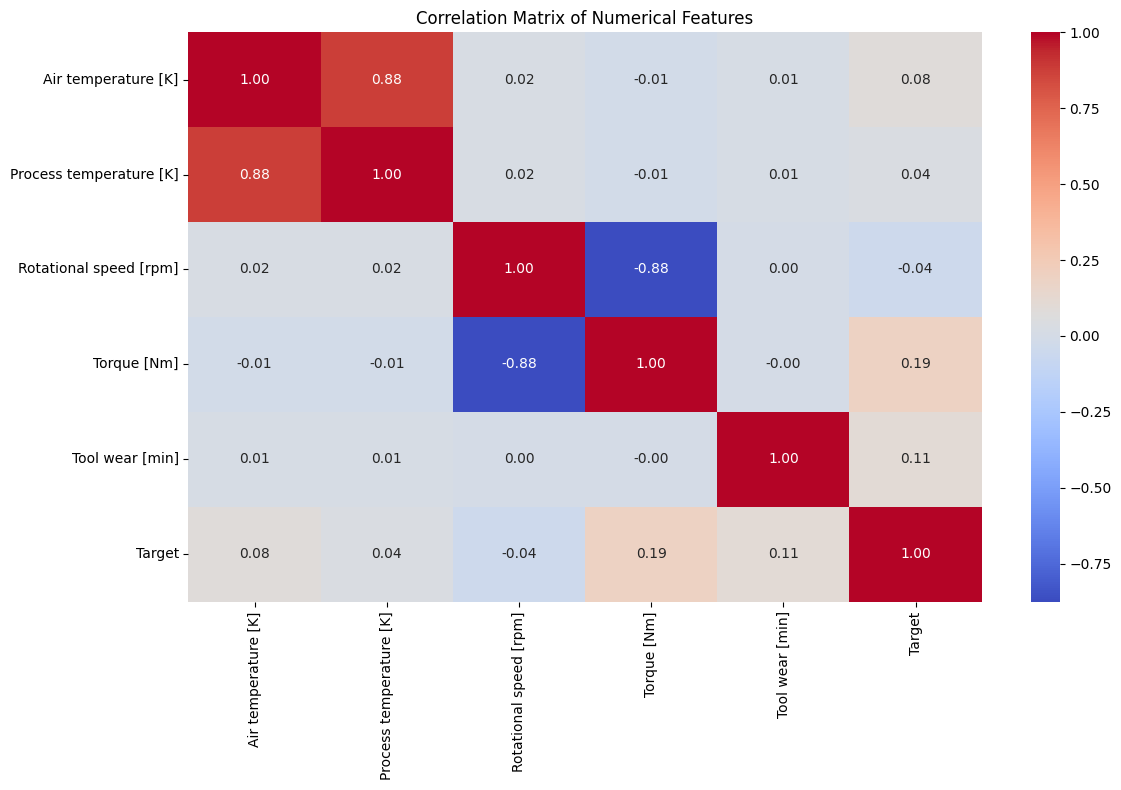

In [14]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols + ['Target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

based on the correlation matrix we will drop [ 'Rotational speed [rpm]','Process temperature [K]' ]

In [15]:
print("\nCorrelations with Target:")
print(correlation_matrix['Target'].sort_values(ascending=False))


Correlations with Target:
Target                     1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Target, dtype: float64


### Leakage Analysis
- **Failure Type**: Near-perfect mapping to `Target` (crosstab: 9643/9661 `Target` = 0 are "No Failure"; correlation: 0.959389), causing leakage.
- **Type**: Weak association (correlation: -0.005152). It‚Äôs a pre-event machine characteristic, not leakage.
- **Numerical Features**: Low correlations (e.g., `Torque [Nm]`: 0.191), indicating no leakage.
### Data Cleaning
- Excluded `UDI`, `Product ID` (non-predictive identifiers).
- One-hot encoded `Type` (`Type_M`, `Type_H`) and `Failure Type` (leaky model).
- Standardized numerical features using `StandardScaler`.(after splitting data to prevent leakage).
- No missing values found.

In [16]:
df_cleaned = df.drop(columns=['Process temperature [K]' ,'Failure Type', 'UDI', 'Product ID','Failure Type Binary' , 'Rotational speed [rpm]','Type_numeric'])
print("\nColumns in df_clean:", df_cleaned.columns.tolist())
print('\n')
print(df_cleaned.isnull().sum())


Columns in df_clean: ['Type', 'Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


Type                   0
Air temperature [K]    0
Torque [Nm]            0
Tool wear [min]        0
Target                 0
dtype: int64


In [17]:
numerical_cols = ['Air temperature [K]','Torque [Nm]', 'Tool wear [min]']

In [18]:
X = df_cleaned.drop('Target', axis=1)
y = df_cleaned['Target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

X_train_clean = pd.get_dummies(X_train, columns=['Type'], drop_first=True)
X_test_clean = pd.get_dummies(X_test, columns=['Type'], drop_first=True)

scaler_clean = StandardScaler()


X_train_clean[numerical_cols] = scaler_clean.fit_transform(X_train_clean[numerical_cols])
X_test_clean[numerical_cols] = scaler_clean.transform(X_test_clean[numerical_cols])

In [20]:
X_train_clean.head()

Air temperature [K]  Torque [Nm]  Tool wear [min]  Type_L  Type_M
4058             0.998914     0.718305        -0.843997   False    True
1221            -1.505194     0.638456         0.382263   False    True
6895             0.498092     0.558607         0.460870   False    True
9863            -0.553633     1.626586        -0.372359    True   False
8711            -1.455112    -1.128202        -0.906882    True   False

In [21]:
X_test_clean.head()

Air temperature [K]  Torque [Nm]  Tool wear [min]  Type_L  Type_M
2997             0.247681     2.265378         0.712410    True   False
4871             1.850310     0.009646         0.429427    True   False
3858             1.249324    -0.239882         1.592802    True   False
951             -2.206344    -0.419543        -0.749670   False   False
6463             0.247681     2.035812        -0.089376   False   False

In [22]:
df_with_leakage = df.drop(columns=['Process temperature [K]' ,'UDI', 'Product ID','Failure Type Binary','Rotational speed [rpm]','Type_numeric'])

X_leak = df_with_leakage.drop('Target', axis=1)
y_leak = df_with_leakage['Target']

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_leak, y_leak, test_size=0.2, random_state=42,stratify=y_leak)
x_train_l = pd.get_dummies(X_train_l, columns=['Type','Failure Type'], drop_first=True)
x_test_l = pd.get_dummies(X_test_l, columns=['Type','Failure Type'], drop_first=True)

scaler_leak = StandardScaler()
x_train_l[numerical_cols] = scaler_leak.fit_transform(x_train_l[numerical_cols])
x_test_l[numerical_cols] = scaler_leak.transform(x_test_l[numerical_cols])

In [23]:
x_train_l.head()

Air temperature [K]  Torque [Nm]  Tool wear [min]  Type_L  Type_M  \
4058             0.998914     0.718305        -0.843997   False    True   
1221            -1.505194     0.638456         0.382263   False    True   
6895             0.498092     0.558607         0.460870   False    True   
9863            -0.553633     1.626586        -0.372359    True   False   
8711            -1.455112    -1.128202        -0.906882    True   False   

      Failure Type_No Failure  Failure Type_Overstrain Failure  \
4058                     True                            False   
1221                    False                            False   
6895                     True                            False   
9863                     True                            False   
8711                     True                            False   

      Failure Type_Power Failure  Failure Type_Random Failures  \
4058                       False                         False   
1221                       False                          True   
6895                       False                         False   
9863                       False                         False   
8711                       False                         False   

      Failure Type_Tool Wear Failure  
4058                           False  
1221                           False  
6895                           False  
9863                           False  
8711                           False

In [24]:
x_test_l.head()

Air temperature [K]  Torque [Nm]  Tool wear [min]  Type_L  Type_M  \
2997             0.247681     2.265378         0.712410    True   False   
4871             1.850310     0.009646         0.429427    True   False   
3858             1.249324    -0.239882         1.592802    True   False   
951             -2.206344    -0.419543        -0.749670   False   False   
6463             0.247681     2.035812        -0.089376   False   False   

      Failure Type_No Failure  Failure Type_Overstrain Failure  \
2997                     True                            False   
4871                     True                            False   
3858                     True                            False   
951                      True                            False   
6463                     True                            False   

      Failure Type_Power Failure  Failure Type_Random Failures  \
2997                       False                         False   
4871                       False                         False   
3858                       False                         False   
951                        False                         False   
6463                       False                         False   

      Failure Type_Tool Wear Failure  
2997                           False  
4871                           False  
3858                           False  
951                            False  
6463                           False

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_l, y_train_l)

importances = pd.Series(rf.feature_importances_, index=x_train_l.columns).sort_values(ascending=False)
print("\nFeature Importances from Random Forest:")
print(importances)


Feature Importances from Random Forest:
Failure Type_No Failure            0.590842
Failure Type_Power Failure         0.132813
Failure Type_Overstrain Failure    0.105532
Torque [Nm]                        0.053685
Failure Type_Tool Wear Failure     0.050939
Failure Type_Random Failures       0.029817
Tool wear [min]                    0.018611
Air temperature [K]                0.015246
Type_M                             0.001288
Type_L                             0.001226
dtype: float64


In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_clean, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train_clean.columns).sort_values(ascending=False)
print("\nFeature Importances from Random Forest:")
print(importances)


Feature Importances from Random Forest:
Torque [Nm]            0.558706
Tool wear [min]        0.250199
Air temperature [K]    0.161491
Type_L                 0.018142
Type_M                 0.011463
dtype: float64


### Part 4: Data Leakage Detection Techniques (Bonus)

#### 1. Correlation and Crosstab Analysis
- **Description**: This technique involves computing correlations between features and the target variable or creating crosstabs to examine the distribution of target values across feature categories. High correlations (e.g., >0.9) or near-perfect mappings in crosstabs (e.g., 100% or 0% proportions) indicate potential leakage.


#### 2. Random Forest Feature Importance Analysis
- **Description**: This technique uses a Random Forest Classifier to compute feature importances, . Features with  high importances  may indicate leakage, .


#### Limitations of Detection Techniques
- **Correlation and Crosstab Analysis**:
  -  May miss leakage in features with non-linear relationships to the target.
  -  Crosstabs are less effective for continuous features (e.g., `Torque [Nm]`).
  -  Requires understanding whether high correlations are legitimate (e.g., `Torque` as a predictor) or leakage (e.g., `Failure Type`).
- **Random Forest Feature Importance Analysis**:
  - High importance for legitimate predictors (e.g., `Torque` ) may be mistaken for leakage without domain knowledge.
  - **Overfitting Risk**: In small datasets, Random Forest may overfit.
  

In [27]:
# Model without leakage
lr = LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train_clean, y_train)
nb = GaussianNB()
nb.fit(X_train_clean, y_train)

# Model with leakage
lr_leak = LogisticRegression(max_iter=1000,random_state=42)
lr_leak.fit(x_train_l, y_train_l)
nb_leak = GaussianNB()
nb_leak.fit(x_train_l, y_train_l)

GaussianNB()

In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

def formatted_evaluation(model, X_test, y_test, name):
    print(f"\n{name}")
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(tabulate([["Accuracy", acc],
                    ["Precision", prec],
                    ["Recall", rec],
                    ["F1 Score", f1]],
                   headers=["Metric", "Value"], tablefmt="fancy_grid", floatfmt=".4f"))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(tabulate(cm, headers=["Pred 0", "Pred 1"], showindex=["Actual 0", "Actual 1"], tablefmt="fancy_grid"))

    print("\nClassification Report:")
    report = classification_report(y_test, y_pred, output_dict=True)
    report_table = []

    for label in ['0', '1', 'accuracy', 'macro avg', 'weighted avg']:
        if label == 'accuracy':
            report_table.append([label, f"{report[label]:.2f}", "", "", ""])
        else:
            report_table.append([label] + [f"{report[label][metric]:.2f}" for metric in ['precision', 'recall', 'f1-score', 'support']])

    print(tabulate(report_table,
                   headers=["Class", "Precision", "Recall", "F1-Score", "Support"],
                   tablefmt="fancy_grid"))

In [ ]:
print("Without Leakage:")

formatted_evaluation(lr, X_test_clean, y_test, "üîπ Logistic Regression")
formatted_evaluation(nb, X_test_clean, y_test, "üîπ Naive Bayes")

Without Leakage:

üîπ Logistic Regression
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Metric    ‚îÇ   Value ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Accuracy  ‚îÇ  0.9665 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Precision ‚îÇ  0.6667 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Recall    ‚îÇ  0.0294 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ F1 Score  ‚îÇ  0.0563 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ

Confusion Matrix:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ          ‚îÇ   Pred 0 ‚îÇ   Pred 1 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Actual 0 ‚îÇ     1931 ‚îÇ        1 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚

In [ ]:
print("with Leakage:")

formatted_evaluation(lr_leak, x_test_l, y_test_l, "üîπ Logistic Regression")
formatted_evaluation(nb_leak, x_test_l, y_test_l, "üîπ Naive Bayes")

with Leakage:

üîπ Logistic Regression
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Metric    ‚îÇ   Value ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Accuracy  ‚îÇ  0.9990 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Precision ‚îÇ  1.0000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Recall    ‚îÇ  0.9706 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ F1 Score  ‚îÇ  0.9851 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ

Confusion Matrix:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ          ‚îÇ   Pred 0 ‚îÇ   Pred 1 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Actual 0 ‚îÇ     1932 ‚îÇ        0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚

### Model Performance Comparison
- **Clean Models** (Logistic Regression, Naive Bayes):
  - Accuracy 0.966, but very low recall (0.03‚Äì0.04) and F1-score (0.06‚Äì0.08) for failures (`Target` = 1).
  - Reflects the imbalanced dataset (9661:339) and absence of leakage, making failure prediction challenging.
- **Leaky Models** (including `Failure Type`):
  - Near-perfect metrics (accuracy ~0.999, recall ~0.971, F1 ~0.985).
  - `Failure Type` directly reveals `Target` (correlation: 0.959389), causing unrealistic performance.
- **SMOTE (Clean)**:
  - Lower accuracy (0.734‚Äì0.76) but higher recall (0.765‚Äì0.779) and F1 (~0.166‚Äì0.180), improving failure detection.
- **SMOTE (leakage)**:
  - Near-perfect metrics (accuracy ~0.999, recall ~0.971, F1 ~0.98).
  - `Failure Type` directly reveals `Target` (correlation: 0.959389), causing unrealistic performance.


In [ ]:
# Apply SMOTE to training data (without leakage)
smote = SMOTE(random_state=42)
X_train_clean_smote, y_train_clean_smote = smote.fit_resample(X_train_clean, y_train)

In [ ]:
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_train_clean_smote, y_train_clean_smote)

formatted_evaluation(lr_smote, X_test_clean, y_test, "üîπ Logistic Regression + SMOTE (No Leakage)")


üîπ Logistic Regression + SMOTE (No Leakage)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Metric    ‚îÇ   Value ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Accuracy  ‚îÇ  0.7340 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Precision ‚îÇ  0.0930 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Recall    ‚îÇ  0.7794 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ F1 Score  ‚îÇ  0.1661 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ

Confusion Matrix:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ          ‚îÇ   Pred 0 ‚îÇ   Pred 1 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Actual 0 ‚îÇ     1415 ‚îÇ      517 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ

In [ ]:
nb_smote = GaussianNB()
nb_smote.fit(X_train_clean_smote, y_train_clean_smote)
formatted_evaluation(nb_smote, X_test_clean, y_test, "üîπ Naive Bayes + SMOTE (No Leakage)")


üîπ Naive Bayes + SMOTE (No Leakage)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Metric    ‚îÇ   Value ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Accuracy  ‚îÇ  0.7625 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Precision ‚îÇ  0.1018 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Recall    ‚îÇ  0.7647 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ F1 Score  ‚îÇ  0.1796 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ

Confusion Matrix:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ          ‚îÇ   Pred 0 ‚îÇ   Pred 1 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Actual 0 ‚îÇ     1473 ‚îÇ      459 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚î

In [ ]:
# Apply SMOTE to training data (with leakage)
smote_leak = SMOTE(random_state=42)
x_train_l_smote, y_train_l_smote = smote_leak.fit_resample(x_train_l, y_train_l)

In [ ]:
lr_leak_smote = LogisticRegression(max_iter=1000)
lr_leak_smote.fit(x_train_l_smote, y_train_l_smote)
formatted_evaluation(lr_leak_smote, x_test_l, y_test_l, "üîπ Logistic Regression + SMOTE (With Leakage)")


üîπ Logistic Regression + SMOTE (With Leakage)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Metric    ‚îÇ   Value ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Accuracy  ‚îÇ  0.9985 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Precision ‚îÇ  0.9851 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Recall    ‚îÇ  0.9706 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ F1 Score  ‚îÇ  0.9778 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ

Confusion Matrix:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ          ‚îÇ   Pred 0 ‚îÇ   Pred 1 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Actual 0 ‚îÇ     1931 ‚îÇ        1 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚

In [ ]:
nb_leak_smote = GaussianNB()
nb_leak_smote.fit(x_train_l_smote, y_train_l_smote)
formatted_evaluation(nb_leak_smote, x_test_l, y_test_l, "üîπ Naive Bayes + SMOTE (With Leakage)")


üîπ Naive Bayes + SMOTE (With Leakage)
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Metric    ‚îÇ   Value ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Accuracy  ‚îÇ  0.9990 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Precision ‚îÇ  1.0000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Recall    ‚îÇ  0.9706 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ F1 Score  ‚îÇ  0.9851 ‚îÇ
‚ïò‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïß‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïõ

Confusion Matrix:
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ          ‚îÇ   Pred 0 ‚îÇ   Pred 1 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Actual 0 ‚îÇ     1932 ‚îÇ        0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ